# Projection and Orthogonalization

This text and code is derived from Mike X Cohen's course on linear algebra. For more information, see https://www.udemy.com/linear-algebra-theory-and-implementation/?couponCode=LINALGPX7

Enhancements made by me for this section: 
- plots 
- detailed and more formal explanation of why R is upper triangular (based on Mike's explanation)

## Table of contents 
- [Projections in $\mathbb{R^2}$](#r2)
- [Projections in $\mathbb{R}^N$](#rn)  
- [Orthogonal and parallel vector components](#components)
- [Orthogonal Matrices](#ortho)  
- [Gram-Schmidt Process](#gramschmidt)  
- [QR Decomposition](#qr)

In [265]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# preliminary setting 
def draw_setting(ax,a,b):
    ax.set_xlim(-0.1,5);
    ax.set_ylim(-0.1,5);
    ax.grid();
    shift = 0.1*np.array([-1,1])
    x1=a+0.1*np.array([-1,1])
    x2=b+0.1*np.array([-1,1])
    ax.plot([0,a[0]],[0,a[1]], label="a");
    ax.plot([0,b[0]],[0,b[1]], label="b");
    ax.plot(*b, marker='o', color='orange', ls='',label="B")
    ax.annotate("B",v2+0.1, fontsize=16);
    ax.plot(0,0, marker='o', color='orange', ls='',label="C")
    ax.annotate("O",[0.1,0.2], fontsize=16);    
    ax.text(*(a+shift),"a",fontsize=14);
    ax.text(*(b+shift),"b",fontsize=14);

<a id="r2"></a>
## Projections in $\mathbb{R^2}$

Let's say we have two non-collinear and non-orthogonal vectors in $\mathbb{R^2}$: $\mathbf{a}$ and $\mathbf{b}$.

In [266]:
a = np.array([4,4])
b = np.array([3,1])

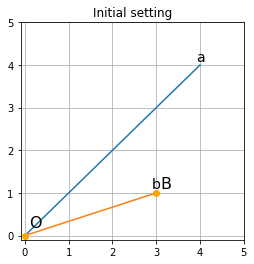

In [340]:
fig = plt.figure(figsize=(4, 4));
ax = fig.add_subplot(111);
draw_setting(ax,a,b);
ax.set_title("Initial setting");
plt.show()

**Goal:** We want to project point $B$ on $\mathbf{a}$ such that the distance between $B$ and $\mathbf{a}$ is minimal. 

Obviously, the shortest path is the straight path, so we want to draw a line from $B$ to $\mathbf{a}$, so that this line intersects $\mathbf{a}$ at the right angle. Let's say that it happens at some point $C$ (let it be vector $\mathbf{c}$). $\mathbf{C} \in \mathbf{a} \implies \mathbf{c} = \beta \mathbf{a}$

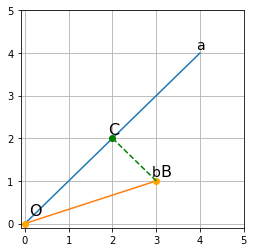

In [341]:
x = a*((b@a)/(a@a))
fig = plt.figure(figsize=(4, 4));
ax = fig.add_subplot(111);
draw_setting(ax,a,b);
ax.plot([b[0],x[0]],[b[1],x[1]],'g--')
ax.plot(*x, marker='o', color='green', ls='',label="C")
ax.annotate("C",x+[-0.1,0.1], fontsize=16);
plt.show()

Geometrically, $\mathbf{CB}$ is the difference between $\mathbf{c}$ and $\mathbf{b}$:

$$\mathbf{CB} = \mathbf{b-c} = \mathbf{b-\beta a}$$

We also know that: 

$$(\mathbf{b-\beta a}) \perp \mathbf{CB}$$

Hence, we can write (because the dot product of two orthogonal vectors is 0): 

$$\mathbf{a^T} (\mathbf{b - \beta a}) = 0 $$

Now we just have to find $\beta$: 

$$\begin{align*}
&\mathbf{a^T} (\mathbf{b - \beta a}) = 0 \\
&\mathbf{a^T b - a^T} \beta \mathbf{a} = 0 \\
&\boxed{\beta = \frac{\mathbf{a^T b}}{\mathbf{a^T a}} = \frac{\mathbf{a^T b}}{\mathbf{||a||^2}}} 
\end{align*}$$

Boxed is the projection formula which is an example of a very common procedure when we divide mapping ($\mathbf{a^T b}$) over magnitude ($\mathbf{a^T a}$)

<a id="rn"></a>
## Projections in $\mathbb{R}^N$

Now we would like to project $\mathbf{b}$ onto some vector space spanned by $\mathbf{A}$. Similarly to $\mathbb{R}^2$ we can write: 

$$\mathbf{A^T (b - A x) = 0}$$

Note that vector $\mathbf{x}$ contains $\beta$-s for all dimensions. Then we can easily derive $\mathbf{x}$: 



$$\begin{align*}
&\mathbf{A^T b - A^T A x = 0} \\\\ 
&\mathbf{A^T A x = A^T b} \\\\
&\mathbf{(A^T A)^{-1} A^T A x = (A^T A)^{-1} A^T b} \\\\
&\mathbf{(A^T A)^{-1} (A^T A) x = (A^T A)^{-1} A^T b} \\\\
&\mathbf{I x = (A^T A)^{-1} A^T b} \\\\
&\boxed{\mathbf{x = (A^T A)^{-1} A^T b}} \\\\
\end{align*}$$

**NOTE**: We can't assume that $\mathbf{A}$ is square and full-rank, but we know that $\mathbf{A^T A}$ is square, so we only need $\mathbf{A}$ to be full column rank (as was the case with left-inverse in part 9).

If a matrix is square, then we can simplify the formula to: 

$$\mathbf{x = (A^T A)^{-1} A^T b} = \mathbf{A^{-1} (A^{T})^{-1} A^T b} = \mathbf{A^{-1} ((A^{T})^{-1} A^T) b} = \mathbf{A^{-1} I b} = \boxed{ \mathbf{A^{-1} b}}$$

<a id="components"></a>
## Orthogonal and parallel vector components 

<a id="components"></a>
**Given**: some arbitrary vector $\mathbf{w}$ and some reference vector $\mathbf{v}$. 

**Goal:** decompose 2D vector $\mathbf{w}$ such that one component is $||$ to $\mathbf{v}$ and the other is $\perp$ to $\mathbf{v}$ such that: 

$$\mathbf{w} = \mathbf{w}_{|| \mathbf{v}} + \mathbf{w}_{\perp \mathbf{v}}$$

**Visual Example**

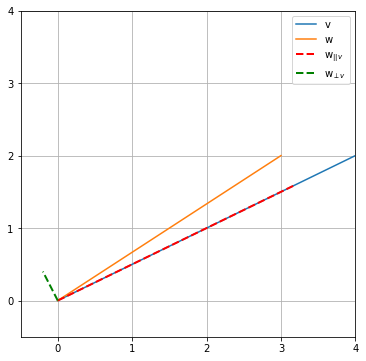

In [348]:
v = np.array([4,2])
w = np.array([3,2])
fig = plt.figure(figsize=(6, 6));
ax = fig.add_subplot(111);    
ax.set_xlim(-0.5,4);
ax.set_ylim(-0.5,4);
ax.plot([0,v[0]],[0,v[1]], label="v");
ax.plot([0,w[0]],[0,w[1]], label="w");
w_par = ((v@w)/(v@v))*v
w_perp = w-w_par 
ax.plot([0,w_par[0]],[0,w_par[1]], 'r--', label="w$_{||v}$", linewidth=2);
ax.plot([0,w_perp[0]],[0,w_perp[1]], 'g--', label="w$_{\perp v}$", linewidth=2);
ax.set_xticks(np.arange(0,5,1));
ax.set_yticks(np.arange(0,5,1));
ax.grid();
ax.legend();
plt.show()

We can easily find $\mathbf{w}_{||\mathbf{v}}$ using projection formula to find the coefficient and then scale $\mathbf{v}$ by it: 

$$\mathbf{w}_{|| \mathbf{v}} = \text{proj}_\mathbf{v} \mathbf{w} = \frac{\mathbf{w^T v}}{\mathbf{v^T v}} \mathbf{v}$$

Then $\mathbf{w}_{\perp \mathbf{v}}$ can be found as follows: 

$$\mathbf{w}_{\perp \mathbf{v}} = \mathbf{w} - \mathbf{w}_{|| \mathbf{v}} $$

To check that these are indeed the vectors we've been looking for, we can verify that their dot product it equal to 0:

$$\mathbf{w}^T_{\perp \mathbf{v}} \mathbf{w}_{|| \mathbf{v}} = (\frac{\mathbf{w^T v}}{\mathbf{v^T v}} \mathbf{v})^T (\mathbf{w} - \frac{\mathbf{w^T v}}{\mathbf{v^T v}} \mathbf{v}) = \frac{\mathbf{w^T v}}{\mathbf{v^T v}} \mathbf{v}^T \mathbf{w} -  \frac{\mathbf{w^T v}}{\mathbf{v^T v}} \frac{\mathbf{w^T v}}{\mathbf{v^T v}} \mathbf{v^T v} = \frac{(\mathbf{w^T v})^2}{\mathbf{v^T v}} - \frac{(\mathbf{w^T v})^2}{\mathbf{v^T v}}$$

<a id="ortho"></a>
## Orthogonal Matrices 

Orthogonal matrix is a matrix such that:  
- all columns are pairwise orthogonal. 
- each column has magnitude 1 

Orthogonal matrices are typically denoted as $\mathbf{Q}$ 

Formal definition: 
$$\langle \mathbf{Q_i,Q_j} \rangle = 
\begin{cases} 
1, \text{if } 1 = j \\
0, \text{if } i \neq j
\end{cases}, \mathbf{Q^T Q = I}$$

$\langle Q_i,Q_j \rangle$  is the dot product of columns $i$ and $j$. If $i=j$ then it's squared magnitude must be equal to 1. If $i \neq j$, then the dot product must be 0. 

Identity matrix is one example of orthogonal matrix: 

$$\mathbf{I^T I = I}$$

We can recall that inverse matrix also produces the identity matrix when multiplied by the original matrix. So we can derive that: 

$$\mathbf{Q^T Q = I}$$

$$\mathbf{Q^{-1} Q = I}$$

$$\implies \mathbf{Q^T Q = Q^{-1} Q}$$

$$\implies \mathbf{Q^T = Q^{-1}}$$

**NOTE:** Orthogonal matrix doesn't have to be square.

However, if a matrix is **square**, it's also true that: 

$$\mathbf{Q^T Q = Q^{-1} Q = Q Q^{-1} = Q Q^T = I}$$

**Example**

$$\frac{1}{\sqrt{2}}{\begin{bmatrix}
1&-1\\
1&1\\
\end{bmatrix}}
$$

In [380]:
A = np.array([[1,-1],[1,1]])*(1/np.sqrt(2))
A

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Check that $\mathbf{Q^T Q}$ produces identity:

In [382]:
np.round(A.T@A,4)

array([[1., 0.],
       [0., 1.]])

Check that $\mathbf{Q^{-1} Q}$ produces identity: 

In [385]:
np.round(np.linalg.inv(A)@A,4)

array([[1., 0.],
       [0., 1.]])

Check that each column is of unit length: 

In [391]:
print(np.round(np.linalg.norm(A[:,0]),4))
print(np.round(np.linalg.norm(A[:,1]),4))

1.0
1.0


Check that columns are orthogonal to each other: 

In [392]:
A[:,0]@A[:,1]

0.0

In $\mathbb{R}^2$ any Q-matrix can be expressed as simple rotation matrix: 

$${\begin{bmatrix}
\cos(\theta)&-\sin(\theta)\\
\sin(\theta)&\cos(\theta)\\
\end{bmatrix}}
$$

Basically, every orthogonal matrix in $\mathbb{R}^2$ is some rotation of the $x$ and $y$ axes that are definied by the identity matrix. Our example is the rotation by $\frac{\pi}{4}$.

In [395]:
def rotation_matrix(theta):
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    return R

In [406]:
R = rotation_matrix(np.pi/4)
I = np.diag([1,1])
IR = I@R
IR

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

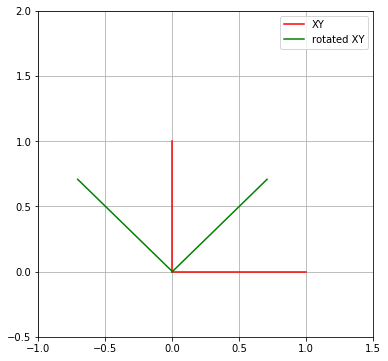

In [418]:
fig = plt.figure(figsize=(6, 6));
ax = fig.add_subplot(111);    
ax.set_xlim(-1,1.5);
ax.set_ylim(-0.5,2);
ax.plot([0,1],[0,0], 'r-', label="XY");
ax.plot([0,0],[0,1], 'r-');
ax.plot([0,IR[0,0]],[0,IR[1,0]], 'g-', label="rotated XY");
ax.plot([0,IR[0,1]],[0,IR[1,1]], 'g-');
ax.grid();
ax.legend();
plt.show()

<a id="gramschmidt"></a>
## Gram-Schmidt and QR-decomposition

Let $\mathbf{A}$ be a matrix with $n$ columns: 
$\mathbf{A} = \begin{bmatrix}
\mathbf{a_{:,1}}&\mathbf{a_{:,2}}&\mathbf{a_{:,3}}&\dots&\mathbf{a_{:,n}}\\
\end{bmatrix}$


The Gram-Schmidt process is performed as follows: 
1. Take $\mathbf{a_{:,1}}$ as is and normalize by dividing it by $||\mathbf{a_{:,1}}||$  
2. For each column from 2 to n do the following: 
    - orthogonalize relative to all n-1 columns preceeding that one
    - normlize

**Example**:  

$A =\begin{bmatrix} 
1&1&-2 \\
3&-1&1\\
\end{bmatrix}$

In [494]:
A = np.array([[1,1,-1],[3,-1,1]])

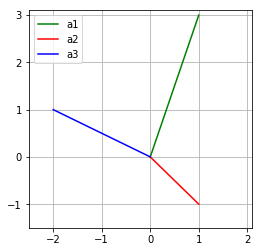

In [495]:
fig = plt.figure(figsize=(4, 4));
ax = fig.add_subplot(111);    
ax.set_xlim(-2.5,2.1);
ax.set_ylim(-1.5,3.1);
ax.plot([0,1],[0,3], 'g-', label="a1");
ax.plot([0,1],[0,-1], 'r-', label="a2");
ax.plot([0,-2],[0,1], 'b-', label="a3");
ax.grid();
ax.legend();
plt.show()

We have 3 vectors in $\mathbb{R}^2$, so one vector must be linearly dependent. Let's perform the Gram-Schmidt procedure:  

*Step 1* Normalize $\mathbf{a_1}$:   
$\mathbf{v}_1 = \frac{1}{||\mathbf{a_{:,1}}||} \mathbf{a_{:,1}} $

In [496]:
v1 = A[:,0]/np.linalg.norm(A[:,0])

In [497]:
v1

array([0.31622777, 0.9486833 ])

*Step 2*

Take $\mathbf{a_2}$ and orthogonalize it relative to $\mathbf{a_1}$:  

$$\mathbf{v}_{2,\perp \mathbf{v_1}} = \mathbf{a_{:,2}} - \mathbf{a}_{:,2,\perp \mathbf{v_1}} = \mathbf{a_{:,2}} -\frac{\mathbf{v_1^T a_{:,2}}}{\mathbf{v_1^T v_1}} \mathbf{v_1}$$

In [498]:
v2 = A[:,1] - ((v1@A[:,1])/(v1@v1))*v1

In [499]:
v2

array([ 1.2, -0.4])

Normalize: 

In [500]:
v2 = v2/np.linalg.norm(v2)
v2

array([ 0.9486833 , -0.31622777])

*Step 3*  
Do the same for $\mathbf{a_3}$: 

$$\mathbf{v}_{3,\perp \mathbf{v_1} \perp \mathbf{v_2}} = \mathbf{a_{:,3}} - \mathbf{v}_{3,\perp \mathbf{v_1}} - \mathbf{a}_{:,3,\perp \mathbf{v_2}}= \mathbf{a_{:,3}} -\frac{\mathbf{v_1^T a_{:,3}}}{\mathbf{v_1^T v_1}} \mathbf{v_1} - \frac{\mathbf{v_2^T a_{:,3}}}{\mathbf{v_2^T v_2}} \mathbf{v_2}$$

In [501]:
v3 = np.round(A[:,2] - v1*((v1@A[:,2])/(v1@v1)) - v2*((v2@A[:,2])/(v2@v2)),6)

In [506]:
v3

array([ 0., -0.])

Obviously, the last vector is all 0s since it's the only way how we can have an orthogonal matrix of 3 vectors in 2-dimensional space. The result is shown below:

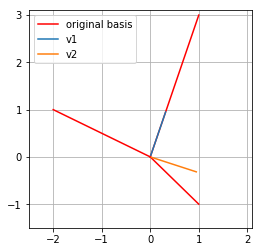

In [491]:
fig = plt.figure(figsize=(4, 4));
ax = fig.add_subplot(111);    
ax.set_xlim(-2.5,2.1);
ax.set_ylim(-1.5,3.1);
ax.plot([0,1],[0,3], 'r-', label="original basis");
ax.plot([0,v1[0]],[0,v1[1]], label="v1");
ax.plot([0,1],[0,-1], 'r-');
ax.plot([0,v2[0]],[0,v2[1]], label="v2");
ax.plot([0,-2],[0,1], 'r-');
ax.grid();
ax.legend();
plt.show()

<a id="qr"></a>
## QR Decomposition

Matrix $\mathbf{Q}$ is **different** from $\mathbf{A}$ - we **lose information** and can't get it back. That's why we need QR-decomposition that allows to get the information back: 

$$\mathbf{A = QR}$$

Finding $\mathbf{R}$ is easy thanks to $\mathbf{Q^{-1}=Q^T}$: 

$$\mathbf{Q^T A = Q^T Q R}$$ 

$$\mathbf{R = Q^T A}$$

We can also use QR-decompositon to compute the matrix inverse. It increases the accuracy of the inverse.  

$$\mathbf{A = QR}$$ 

$$\mathbf{A^{-1} = (QR)^{-1}}$$

$$\mathbf{A^{-1} = R^{-1} Q^{-1}}$$

$$\mathbf{A^{-1} = R^{-1} Q^T}$$

R is upper triangular and it's quite easy to compute its inverse. 

**Why R is upper triangular?**

According to Gram-Schmidt algorithm, we set *later* columns to be orthogonal to *earlier* columns. So, later columns of $\mathbf{Q}$ are orthogonal to earlier columns in $\mathbf{A}$ (directly follows from the algorithm). However, later columns are not necessarily orthogonal to earlier columns in $\mathbf{Q}$.

**Detailed explanation**
$$\mathbf{Q} = \begin{bmatrix} 
\mathbf{q}_{:,1}&\mathbf{q}_{:,2}&\dots&\mathbf{q}_{:,n}\\
\end{bmatrix}, \mathbf{Q} \in \mathbb{R}^{m \times n}$$

$$\mathbf{A} = \begin{bmatrix} 
\mathbf{a}_{:,1}&\mathbf{a}_{:,2}&\dots&\mathbf{a}_{:,n}\\
\end{bmatrix}, \mathbf{A} \in \mathbb{R}^{m \times n}$$

$$\begin{align*}
&{\mathbf{R = Q^T A} = 
\begin{bmatrix} 
\mathbf{q}_{:,1}&\mathbf{q}_{:,1}&\dots&\mathbf{q}_{:,n}\\
\end{bmatrix}^T  \begin{bmatrix} 
\mathbf{a}_{:,1}&\mathbf{a}_{:,2}&\dots&\mathbf{a}_{:,n}\\
\end{bmatrix} = 
\begin{bmatrix} 
\mathbf{q}_{:,1}^T\\
\mathbf{q}_{:,2}^T\\
\dots\\
\mathbf{q}_{:,n}^T\\
\end{bmatrix}  \begin{bmatrix} 
\mathbf{a}_{:,1}&\mathbf{a}_{:,2}&\dots&\mathbf{a}_{:,n}\\
\end{bmatrix} = 
 \begin{bmatrix} 
\mathbf{q}_{:,1}^T \mathbf{a}_{:,1}& \mathbf{q}_{:,1}^T \mathbf{a}_{:,2}&\dots& \mathbf{q}_{:,1}^T \mathbf{a}_{:,n} \\
 \mathbf{q}_{:,2}^T \mathbf{a}_{:,1} & \mathbf{q}_{:,2}^T \mathbf{a}_{:,2}&\dots&  \mathbf{q}_{:,2}^T \mathbf{a}_{:,n} \\
\vdots&\vdots&\ddots&\vdots& \\
 \mathbf{q}_{:,n}^T \mathbf{a}_{:,1} & \mathbf{q}_{:,n}^T \mathbf{a}_{:,2}&\dots& \mathbf{q}_{:,n}^T \mathbf{a}_{:,n} \\
\end{bmatrix} =} \\
&{= 
\begin{bmatrix} 
\mathbf{q}_{:,1}^T\\
\mathbf{q}_{:,2}^T\\
\dots\\
\mathbf{q}_{:,n}^T\\
\end{bmatrix}  \begin{bmatrix} 
\mathbf{a}_{:,1}&\mathbf{a}_{:,2}&\dots&\mathbf{a}_{:,n}\\
\end{bmatrix} = 
 \begin{bmatrix} 
\mathbf{q}_{:,1}^T \mathbf{a}_{:,1}& \mathbf{q}_{:,1}^T \mathbf{a}_{:,2}&\dots& \mathbf{q}_{:,1}^T \mathbf{a}_{:,n} \\
0 & \mathbf{q}_{:,2}^T \mathbf{a}_{:,2}&\dots&  \mathbf{q}_{:,2}^T \mathbf{a}_{:,n} \\
\vdots&\vdots&\ddots&\vdots& \\
0 & 0&\dots& \mathbf{q}_{:,n}^T \mathbf{a}_{:,n} \\
\end{bmatrix}}
\end{align*}
$$

For all the dot products of $\mathbf{q}_{:,i}^T \mathbf{a}_{:,j}$ above and on the diagonal it's true that: 
$j >= i$, so from the "point of view" of column $i$ of the Q-matrix this column of $\mathbf{A}$ have not been processed and orthogonalized yet. 
However, everything that's below the diagonal has $j < i$, so $\mathbf{q}_{:,i}$ has already been made orthogonal to $\mathbf{a}_{:,j}$, according to Gram-Schmidt process. 